# MNIST - Handwritten Digit Classification

2/13/22

Max Rivera

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Preprocessing

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

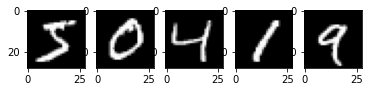

In [3]:
# visualize some of the data
fig,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(X_train[i],cmap='gray')

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Data consists of m examples of images of n x n. To feed into a simple neural network, the images need to be flattend (2 & 3rd dimensions), as well as normalized. Normalization involves setting the range for each sample to between 0 and 1. Since the max pixel value in each sample will be 255, simply dividing by 255 will accomplish this scale. 

In [5]:
# normalize and flatten images
X_train = X_train.reshape(-1,28*28)/ 255.0
X_test = X_test.reshape(-1,28*28)/ 255.0
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Initialize Model

In [6]:
# functional API
inputs = tf.keras.Input(shape=(784))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
output = tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)

2022-02-13 23:04:18.783948: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-13 23:04:18.784371: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)

# Train Model

For datasets < 2000, batch gradient descent is sufficient. However, this dataset has 70,000 samples, so minibatch gradient descent is more efficient in this case. Typical batch sizes are in powers of 2, so let's try 128. Let's also see if 40 epochs is enough to do well. 

In [8]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=40,
    validation_data=(X_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2280 - accuracy: 0.9324 - val_loss: 0.0988 - val_accuracy: 0.9683
Epoch 2/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0845 - accuracy: 0.9737 - val_loss: 0.0980 - val_accuracy: 0.9691
Epoch 3/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0666 - val_accuracy: 0.9810
Epoch 4/40
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 5/40
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.0738 - val_accuracy: 0.9779
Epoch 6/40
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0867 - val_accuracy: 0.9747
Epoch 7/40
60000/60000 [==========================

In [14]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

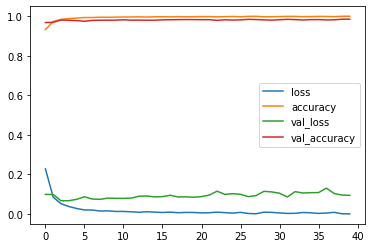

In [12]:
loss = pd.DataFrame(model.history.history)
loss.plot()

It looks like we didn't need to train that long. Let's evaluate. 

# Model Evaluation

In [15]:
model.evaluate(X_test, y_test, batch_size=128,verbose=2)

10000/1 - 0s - loss: 0.0470 - accuracy: 0.9851


[0.09395719879417246, 0.9851]

So in summary, this model achieved a 100% accuracy on the training set and a 98% accuracy on the test set. A smaller number of epochs might have been sufficient to do well on the test set and prevent overfitting.  